In [2]:
%load_ext IPython.extensions.autoreload
%autoreload 2

import warnings
warnings.filterwarnings('ignore')

In [4]:
import sys
sys.path.append('../..')
from model import FinData
from model import train_valid_split
from model import CatboostFinModel
from backtests import Backtest

import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [81]:
a = FinData("../../datasets/MMK_10_min.csv")
a.restrict_time_down(dt.datetime(2024, 10, 12))
b = FinData("../../datasets/MMK_1_min.csv")
b.restrict_time_down(dt.datetime(2024, 10, 12))
a.insert_small_close_shifts(b.df)


In [ ]:
history = {"Sber" : [], "MTS" : [], "Yandex" : [], "MMK" : [], "Gazprom" : [], "Whoosh" : []}
names = ["Gazprom", "Whoosh"]
money = 5000
for stock in names:
        end_date = dt.datetime(2024, 12, 20)
        start_date = dt.datetime(2024, 9, 10)
        st_date = dt.datetime(2024, 8, 1)
        money = 5000
        while start_date < end_date:
                args = {"iterations" : 3000, 
                        "depth" : 5, 
                        "learning_rate" : 0.01, 
                        "use_best_model" : True, 
                        "l2_leaf_reg" : 200,
                        "loss_function" : 'Logloss', 
                        "eval_metric" : 'Logloss', 
                        "cat_features" : [], 
                        "class_weights" : [1, 0.4],
                        "random_state" : 42,
                        "verbose" : 500,
                        "early_stopping_rounds" : 500}

                dfs = ["../../datasets/" + stock + '_10_min.csv']
                backtest = Backtest(strategies=['long'], args=args, dfs=dfs, comissions=[0.0004])

                custom_datasets_args = {'start_dt': st_date, 
                                        'end_dt': start_date, 
                                        'train_size': dt.timedelta(days=30), 'val_size': dt.timedelta(5), 'test_size' : None}
                sm, money = backtest.test_trading(budget=money, custom_datasets_args=custom_datasets_args, proba_limit=0.5, use_PCA=False)
                st_date = st_date + dt.timedelta(days=5)
                start_date = start_date + dt.timedelta(days=5)
                history[stock].append(sm[0])

        


2025-02-26 11:11:59,285 - INFO - Backtesting started for stock - Gazprom
2025-02-26 11:11:59,300 - INFO - Train dates: 2024-08-01 07:00:00 - 2024-08-30 20:40:00 | Valid dates: 2024-08-31 04:00:00 - 2024-09-04 20:40:00 | Test dates: 2024-09-05 04:00:00 - 2024-09-09 20:40:00


0:	learn: 0.6902496	test: 0.6902841	best: 0.6902841 (0)	total: 55.7ms	remaining: 2m 47s
500:	learn: 0.5130727	test: 0.5358226	best: 0.5358226 (500)	total: 22.7s	remaining: 1m 53s
1000:	learn: 0.4945095	test: 0.5345214	best: 0.5344081 (811)	total: 44.5s	remaining: 1m 28s
1500:	learn: 0.4768176	test: 0.5344238	best: 0.5342510 (1108)	total: 1m 6s	remaining: 1m 6s
Stopped by overfitting detector  (500 iterations wait)

bestTest = 0.5342509951
bestIteration = 1108

Shrink model to first 1109 iterations.


2025-02-26 11:13:13,628 - INFO - LONG! - Gazprom, Date&Time: 2024-09-08 18:00:00, proba: 0.5063953007895637 - I bought for 123.0 and sold for 123.26 + commission 3.9401599999999997 -> budget: 5006.45984
2025-02-26 11:13:14,481 - INFO - 


My budget before 5000 and after trading 5006.45984
Mommy, are you prod of me?
2025-02-26 11:13:19,784 - INFO - Backtesting started for stock - Gazprom
2025-02-26 11:13:19,786 - INFO - Train dates: 2024-08-06 04:00:00 - 2024-09-04 20:40:00 | Valid dates: 2024-09-05 04:00:00 - 2024-09-09 20:40:00 | Test dates: 2024-09-10 04:00:00 - 2024-09-14 20:40:00


0:	learn: 0.6903282	test: 0.6904159	best: 0.6904159 (0)	total: 50.2ms	remaining: 2m 30s
500:	learn: 0.5162062	test: 0.5508897	best: 0.5508800 (499)	total: 19.3s	remaining: 1m 36s
1000:	learn: 0.4976773	test: 0.5487145	best: 0.5487092 (932)	total: 38.9s	remaining: 1m 17s
1500:	learn: 0.4805536	test: 0.5475274	best: 0.5474406 (1378)	total: 57.9s	remaining: 57.8s
2000:	learn: 0.4636063	test: 0.5473503	best: 0.5473187 (1994)	total: 1m 19s	remaining: 39.9s
2500:	learn: 0.4493489	test: 0.5473296	best: 0.5471736 (2106)	total: 1m 38s	remaining: 19.7s
Stopped by overfitting detector  (500 iterations wait)

bestTest = 0.5471736134
bestIteration = 2106

Shrink model to first 2107 iterations.


2025-02-26 11:15:03,033 - INFO - LONG! - Gazprom, Date&Time: 2024-09-11 04:30:00, proba: 0.5388583572177779 - I bought for 123.11 and sold for 123.45 + commission 3.94496 -> budget: 5016.114880000001
2025-02-26 11:15:03,181 - INFO - LONG! - Gazprom, Date&Time: 2024-09-11 06:20:00, proba: 0.500603869091042 - I bought for 123.4 and sold for 123.17 + commission 3.94512 -> budget: 5002.969760000001
2025-02-26 11:15:03,829 - INFO - LONG! - Gazprom, Date&Time: 2024-09-11 20:00:00, proba: 0.5145402140427263 - I bought for 121.61 and sold for 121.5 + commission 3.9870040000000007 -> budget: 4994.472756000001
2025-02-26 11:15:03,996 - INFO - LONG! - Gazprom, Date&Time: 2024-09-12 06:10:00, proba: 0.5527261474945019 - I bought for 121.68 and sold for 121.92 + commission 3.9950400000000004 -> budget: 5000.3177160000005
2025-02-26 11:15:04,633 - INFO - LONG! - Gazprom, Date&Time: 2024-09-13 05:50:00, proba: 0.5792320074849993 - I bought for 118.72 and sold for 118.92 + commission 3.992352 -> budge

0:	learn: 0.6905984	test: 0.6905900	best: 0.6905900 (0)	total: 33.8ms	remaining: 1m 41s
500:	learn: 0.5167004	test: 0.5470857	best: 0.5470857 (500)	total: 16.1s	remaining: 1m 20s
1000:	learn: 0.4976591	test: 0.5459484	best: 0.5457224 (739)	total: 31.3s	remaining: 1m 2s
1500:	learn: 0.4797607	test: 0.5446437	best: 0.5446419 (1499)	total: 46.9s	remaining: 46.8s
2000:	learn: 0.4636487	test: 0.5449596	best: 0.5444606 (1666)	total: 1m 1s	remaining: 30.9s
Stopped by overfitting detector  (500 iterations wait)

bestTest = 0.5444606177
bestIteration = 1666

Shrink model to first 1667 iterations.


2025-02-26 11:16:18,362 - INFO - LONG! - Gazprom, Date&Time: 2024-09-15 10:20:00, proba: 0.5374159348923181 - I bought for 120.14 and sold for 120.2 + commission 3.941576 -> budget: 5000.572395999999
2025-02-26 11:16:18,567 - INFO - LONG! - Gazprom, Date&Time: 2024-09-15 15:30:00, proba: 0.5402762145263503 - I bought for 120.03 and sold for 120.17 + commission 3.93928 -> budget: 5002.373115999999
2025-02-26 11:16:18,686 - INFO - LONG! - Gazprom, Date&Time: 2024-09-15 18:40:00, proba: 0.5296403955131621 - I bought for 120.17 and sold for 120.35 + commission 3.944528 -> budget: 5005.808587999999
2025-02-26 11:16:18,769 - INFO - LONG! - Gazprom, Date&Time: 2024-09-15 20:40:00, proba: 0.5090981771863935 - I bought for 120.26 and sold for 120.97 + commission 3.9561720000000005 -> budget: 5030.9624159999985
2025-02-26 11:16:21,248 - INFO - 


My budget before 5002.053971999999 and after trading 5030.9624159999985
Mommy, are you prod of me?
2025-02-26 11:16:25,615 - INFO - Backtesting started

0:	learn: 0.6906288	test: 0.6907091	best: 0.6907091 (0)	total: 45.2ms	remaining: 2m 15s
500:	learn: 0.5145422	test: 0.5535661	best: 0.5534920 (493)	total: 17.3s	remaining: 1m 26s
1000:	learn: 0.4945555	test: 0.5529593	best: 0.5526805 (884)	total: 33.6s	remaining: 1m 7s


In [55]:
sm[0]

,datetime,budget
0,2024-12-14 04:00:00,5107.21916
1,2024-12-14 04:10:00,5107.21916
2,2024-12-14 04:20:00,5107.21916
3,2024-12-14 04:30:00,5107.21916
4,2024-12-14 04:40:00,5107.21916
...,...,...
494,2024-12-18 20:00:00,5107.21916
495,2024-12-18 20:10:00,5107.21916
496,2024-12-18 20:20:00,5107.21916
497,2024-12-18 20:30:00,5107.21916


In [21]:
trading = ['Sber', "MTS", "Yandex", "VTB", "MMK", "Gazprom"]

dates = [dt.datetime(2024, 10, 25) + dt.timedelta(days=i, hours=2) for i in range(2, 3)]

dfs = ["../../datasets/" + stock + "_10_min.csv" for stock in trading]

args = {"iterations" : 3000, 
        "depth" : 5, 
        "learning_rate" : 0.01, 
        "use_best_model" : True, 
        "verbose": 0,
        "l2_leaf_reg" : 200,
        "loss_function" : 'Logloss', 
        "eval_metric" : 'Logloss', 
        "cat_features" : [], 
        "class_weights" : [1, 0.4],
        "random_state" : 42,
        "early_stopping_rounds" : 500}

summ = 10000
hist = []

for date in dates:
        backtest = Backtest(strategies=['long'], args=args, dfs=dfs, comissions=[0.0004])

        custom_datasets_args = {'start_dt': date, 
                                'end_dt': dt.datetime(2024, 12, 1), 
                                'train_size': 3000, 'val_size': 500, 
                                'test_size': 500
                                }
        
        new_m, new_hist = backtest.test_multistock(budget=summ, custom_datasets_args=custom_datasets_args, proba_limit=0.55, use_PCA=False)

        summ += new_m
        hist += new_hist 

print(summ)

MergeError: Incompatible merge dtype, dtype('O') and dtype('<M8[ns]'), both sides must have numeric dtype

In [20]:
trading = ['Sber', "MTS", "Yandex", "VTB", "MMK", "Gazprom"]

dates = [dt.datetime(2024, 10, 15) + dt.timedelta(days=i, hours=2) for i in range(0, 15, 3)]

dfs = ["../../datasets/" + stock + "_10_min.csv" for stock in trading]

args = [{"iterations" : 3000, 
        "depth" : 5, 
        "learning_rate" : 0.01, 
        "use_best_model" : True, 
        "l2_leaf_reg" : 200,
        "loss_function" : 'Logloss', 
        "eval_metric" : 'Logloss', 
        "cat_features" : [], 
        "class_weights" : [1, 0.35],
        "random_state" : 42,
        "early_stopping_rounds" : 500, 
        "verbose" : 0}, 
        {"iterations" : 3000, 
        "depth" : 5, 
        "learning_rate" : 0.01, 
        "use_best_model" : True, 
        "l2_leaf_reg" : 200,
        "loss_function" : 'Logloss', 
        "eval_metric" : 'Logloss', 
        "cat_features" : [], 
        "class_weights" : [0.35, 1],
        "random_state" : 42,
        "early_stopping_rounds" : 500, 
        "verbose" : 0}]

summ = 10000
hist = []

for date in dates:
        backtest = Backtest(strategies=['long-short'], args=args, dfs=dfs, comissions=[0.0004])

        custom_datasets_args = {'start_dt': date, 
                                'end_dt': dt.datetime(2024, 12, 1), 
                                'train_size': 2000, 'val_size': 500, 
                                'test_size': 300
                                }
        
        new_m, new_hist = backtest.test_multistock(budget=summ, custom_datasets_args=custom_datasets_args, proba_limit=0.55, use_PCA=True)

        summ += new_m
        hist += new_hist 

print(summ)

2025-02-25 15:29:05,324 - INFO - Training long model starterd for stock - Sber
2025-02-25 15:29:05,324 - INFO - Train dates: 2024-10-15 04:00:00 - 2024-11-04 05:30:00 | Valid dates: 2024-11-04 05:40:00 - 2024-11-09 08:10:00 | Test dates: 2024-11-09 08:20:00 - 2024-11-12 08:10:00
2025-02-25 15:29:22,562 - INFO - Training long model ended with loss {'learn': {'Logloss': 0.4421620478695895}, 'validation': {'Logloss': 0.5752965862579954}}
2025-02-25 15:29:34,727 - INFO - Training short model starterd for stock - Sber
2025-02-25 15:29:34,729 - INFO - Train dates: 2024-10-15 04:00:00 - 2024-11-04 05:30:00 | Valid dates: 2024-11-04 05:40:00 - 2024-11-09 08:10:00 | Test dates: 2024-11-09 08:20:00 - 2024-11-12 08:10:00
2025-02-25 15:29:51,292 - INFO - Training short model ended with loss {'learn': {'Logloss': 0.4586804338925722}, 'validation': {'Logloss': 0.515218389014524}}
2025-02-25 15:29:57,936 - INFO - Training long model starterd for stock - MTS
2025-02-25 15:29:57,937 - INFO - Train date

KeyboardInterrupt: 

In [105]:
import numpy as np

In [106]:
np.argsort([(1, 2, 3), (3, 2, 1), (2, 3, 4)])

array([[0, 1, 2],
       [2, 1, 0],
       [0, 1, 2]], dtype=int64)

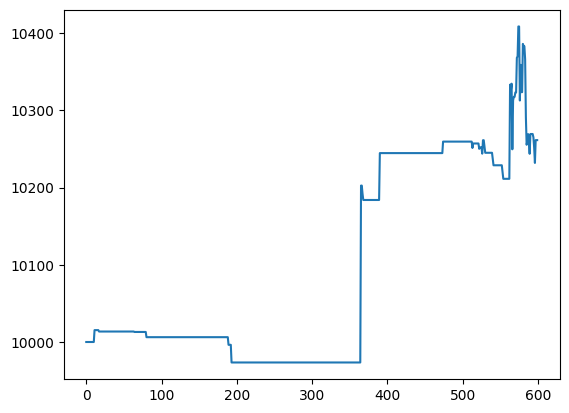

In [90]:
plt.plot(hist)

In [58]:
history

{'Sber': [               datetime      budget
  0   2024-09-05 04:00:00  5000.00000
  1   2024-09-05 04:10:00  5000.00000
  2   2024-09-05 04:20:00  5000.00000
  3   2024-09-05 04:30:00  5000.00000
  4   2024-09-05 04:40:00  5000.00000
  ..                  ...         ...
  494 2024-09-09 20:00:00  5001.82048
  495 2024-09-09 20:10:00  5001.82048
  496 2024-09-09 20:20:00  5001.82048
  497 2024-09-09 20:30:00  5001.82048
  498 2024-09-09 20:40:00  5001.82048
  
  [499 rows x 2 columns],
                 datetime      budget
  0   2024-09-10 04:00:00  5001.82048
  1   2024-09-10 04:10:00  5001.82048
  2   2024-09-10 04:20:00  5001.82048
  3   2024-09-10 04:30:00  5001.82048
  4   2024-09-10 04:40:00  5001.82048
  ..                  ...         ...
  489 2024-09-14 20:00:00  5068.48480
  490 2024-09-14 20:10:00  5068.48480
  491 2024-09-14 20:20:00  5068.48480
  492 2024-09-14 20:30:00  5068.48480
  493 2024-09-14 20:40:00  5068.48480
  
  [494 rows x 2 columns],
                 datet

In [59]:
data = {"Sber" : [], "MTS" : [], "Yandex" : [], "MMK" : []}

In [61]:
import pandas as pd

In [64]:
history["Yandex"]

[               datetime  budget
 0   2024-09-05 04:00:00    5000
 1   2024-09-05 04:10:00    5000
 2   2024-09-05 04:20:00    5000
 3   2024-09-05 04:30:00    5000
 4   2024-09-05 04:40:00    5000
 ..                  ...     ...
 493 2024-09-09 20:00:00    5000
 494 2024-09-09 20:10:00    5000
 495 2024-09-09 20:20:00    5000
 496 2024-09-09 20:30:00    5000
 497 2024-09-09 20:40:00    5000
 
 [498 rows x 2 columns],
                datetime     budget
 0   2024-09-10 04:00:00  5000.0000
 1   2024-09-10 04:10:00  5000.0000
 2   2024-09-10 04:20:00  5000.0000
 3   2024-09-10 04:30:00  5000.0000
 4   2024-09-10 04:40:00  5000.0000
 ..                  ...        ...
 489 2024-09-14 20:00:00  4986.3044
 490 2024-09-14 20:10:00  4986.3044
 491 2024-09-14 20:20:00  4986.3044
 492 2024-09-14 20:30:00  4986.3044
 493 2024-09-14 20:40:00  4986.3044
 
 [494 rows x 2 columns],
                datetime     budget
 0   2024-09-15 04:00:00  4986.3044
 1   2024-09-15 04:10:00  4986.3044
 2   2024-

In [65]:
for company, dfs in history.items():
    if company == "Gazprom":
        break
    data[company] = pd.concat(dfs, ignore_index=True)


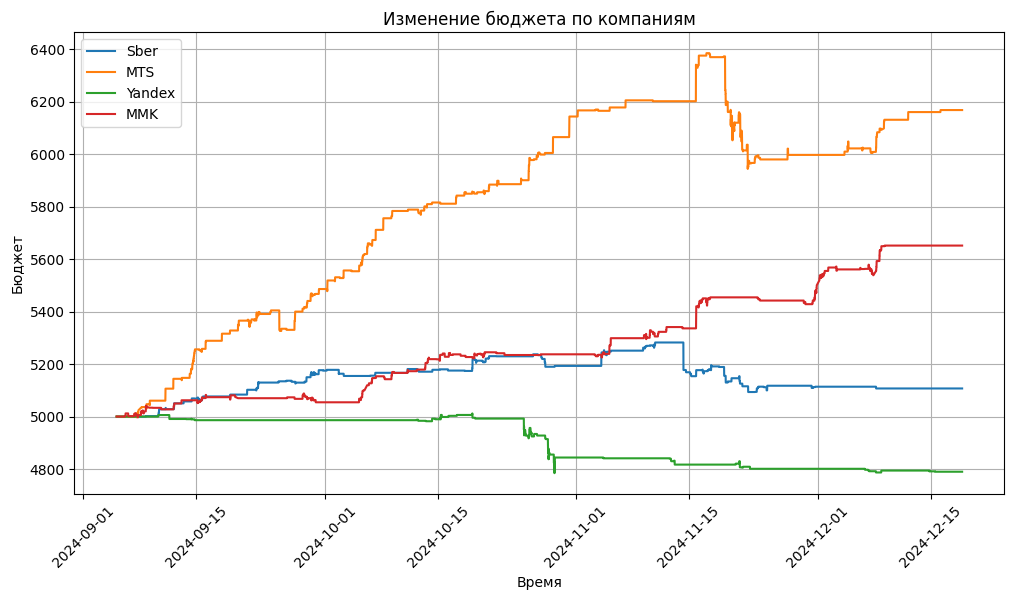

In [67]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))  # Размер графика

for company, df in data.items():
    plt.plot(df["datetime"], df["budget"], label=company)  # Линия для каждой компании

# Настройки графика
plt.xlabel("Время")
plt.ylabel("Бюджет")
plt.title("Изменение бюджета по компаниям")
plt.legend()  # Легенда с названиями компаний
plt.xticks(rotation=45)  # Поворачиваем подписи на оси X
plt.grid(True)  # Добавляем сетку

plt.show()
